## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
import pyspark
sc

SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
import pandas as pd
import numpy as np


In [0]:
# File location and type
file_location = "/FileStore/tables/Housing-1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df.head

Out[134]: <bound method DataFrame.head of DataFrame[price: string, bedrooms: string, bathrooms: string, sqft_living: string, sqft_lot: string, floors: string, waterfront: string, view: string, condition: string, grade: string, sqft_above: string, sqft_basement: string, yr_built: string, yr_renovated: string, zipcode: string, lat: string, long: string, sqft_living15: string, sqft_lot15: string]>

In [0]:
housing = df.select("*").toPandas()

In [0]:
housing.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,432000,5,2.75,2060,329903,1.5,0,3,5,7,2060,0,1989,0,98022,47.1776,-121.944,2240,220232
1,170000,2,1,810,8424,1,0,0,4,6,810,0,1959,0,98023,47.3286,-122.346,820,8424
2,235000,3,1,960,5030,1,0,0,3,7,960,0,1955,0,98118,47.5611,-122.28,1460,5400
3,350000,2,1,830,5100,1,0,0,4,7,830,0,1942,0,98126,47.5259,-122.379,1220,5100
4,397380,2,1,1030,5072,1,0,0,3,6,1030,0,1924,1958,98115,47.6962,-122.294,1220,6781


In [0]:
housing.shape

Out[6]: (19606, 19)

In [0]:
housing.dtypes

Out[7]: price            object
bedrooms         object
bathrooms        object
sqft_living      object
sqft_lot         object
floors           object
waterfront       object
view             object
condition        object
grade            object
sqft_above       object
sqft_basement    object
yr_built         object
yr_renovated     object
zipcode          object
lat              object
long             object
sqft_living15    object
sqft_lot15       object
dtype: object

In [0]:
housing['price']=housing['price'].astype('float')
housing['bedrooms']=housing['bedrooms'].astype('float')
housing['bathrooms']=housing['bathrooms'].astype('float')
housing['sqft_lot']=housing['sqft_lot'].astype('float')
housing['floors']=housing['floors'].astype('float')
housing['grade']=housing['grade'].astype('float')
housing['yr_built']=housing['yr_built'].astype('float')
housing['zipcode']=housing['zipcode'].astype('float')
housing['lat']=housing['lat'].astype('float')
housing['long']=housing['long'].astype('float')
housing['sqft_lot15']=housing['sqft_lot15'].astype('float')
housing['sqft_living']=housing['sqft_living'].astype('float')




In [0]:
housing['waterfront']=housing['waterfront'].astype('int')
housing['view']=housing['view'].astype('int')
housing['condition']=housing['condition'].astype('int')
housing['sqft_above']=housing['sqft_above'].astype('int')
housing['sqft_basement']=housing['sqft_basement'].astype('int')
housing['yr_renovated']=housing['yr_renovated'].astype('int')
housing['sqft_living15']=housing['sqft_living15'].astype('int')



In [0]:
housing.dtypes

Out[10]: price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade            float64
sqft_above         int64
sqft_basement      int64
yr_built         float64
yr_renovated       int64
zipcode          float64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15       float64
dtype: object

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size=0.3)

In [0]:
test.shape


Out[12]: (5882, 19)

In [0]:
train.shape

Out[13]: (13724, 19)

In [0]:
train_y = train[['price']]
test_y = test[['price']]

train_inputs = train.drop(['price'], axis=1)
test_inputs = test.drop(['price'], axis=1)

In [0]:
train_y.head()

,price
6565,348500.0
1166,420000.0
4779,280000.0
10712,353000.0
5475,802000.0


In [0]:
train_inputs.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6565,4.0,1.75,1870.0,7575.0,1.0,0,0,3,7.0,1480,390,1972.0,0,98034.0,47.7205,-122.218,1670,7575.0
1166,2.0,2.50,1480.0,1369.0,3.0,0,0,3,7.0,1480,0,2009.0,0,98052.0,47.6760,-122.121,1390,1337.0
4779,3.0,2.50,1600.0,4271.0,2.0,0,0,3,7.0,1600,0,2000.0,0,98001.0,47.3303,-122.269,1700,4746.0
10712,2.0,1.00,860.0,8511.0,1.0,0,0,3,7.0,860,0,1949.0,0,98125.0,47.7312,-122.300,1554,8499.0
5475,3.0,1.75,2870.0,5000.0,1.5,0,0,4,8.0,1840,1030,1907.0,0,98144.0,47.5788,-122.292,2200,5000.0


In [0]:
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

In [0]:
binary_columns = ['waterfront']

In [0]:
categorical_columns=[]

In [0]:

for col in binary_columns:
    numeric_columns.remove(col)

In [0]:
numeric_columns

Out[21]: ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [0]:
binary_columns

Out[22]: ['waterfront']

In [0]:
categorical_columns

Out[23]: []

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [0]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [0]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [0]:
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

In [0]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('binary', binary_transformer, binary_columns)],
        remainder='passthrough')

#passtrough is an optional step. You don't have to use it.

In [0]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

Out[29]: array([[ 0.75010911, -0.39023544, -0.07663784, ..., -0.36929065,
        -0.18082613,  0.        ],
       [-1.41646933,  0.68669823, -0.60894928, ..., -0.85181847,
        -0.42399711,  0.        ],
       [-0.33318011,  0.68669823, -0.44516114, ..., -0.31759124,
        -0.29110678,  0.        ],
       ...,
       [ 1.83339833,  1.76363189,  2.13450195, ...,  1.33678988,
         0.00726299,  0.        ],
       [ 0.75010911,  0.68669823,  1.43840239, ...,  1.88825025,
        -0.23836386,  0.        ],
       [ 1.83339833,  0.68669823,  1.53394547, ...,  1.14722538,
        -0.05409499,  0.        ]])

In [0]:
train_x.shape

Out[30]: (13724, 18)

In [0]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

Out[31]: array([[ 0.75010911,  1.404654  ,  0.07350128, ..., -0.35205751,
        -0.26748357,  0.        ],
       [ 0.75010911,  0.68669823,  0.60581271, ...,  0.54406559,
        -0.15268098,  0.        ],
       [-0.33318011,  0.68669823,  0.00525622, ..., -0.19695928,
        -0.3006964 ,  0.        ],
       ...,
       [-1.41646933, -0.39023544, -1.2504528 , ..., -0.71395338,
        -0.32018751,  0.        ],
       [-1.41646933,  0.68669823, -0.60894928, ...,  0.42343364,
        -0.37647781,  0.        ],
       [ 1.83339833,  1.76363189,  1.50664744, ...,  0.23386913,
        -0.1872582 ,  0.        ]])

In [0]:
test_x.shape

Out[32]: (5882, 18)

In [0]:
train_y.head()

,price
6565,348500.0
1166,420000.0
4779,280000.0
10712,353000.0
5475,802000.0


In [0]:
mean_value = np.mean(train_y['price'])
mean_value

Out[34]: 454853.90935587295

In [0]:
#Baseline predicting all as mean 

baseline_pred = np.repeat(mean_value, len(test_y))

baseline_pred

Out[35]: array([454853.90935587, 454853.90935587, 454853.90935587, ...,
       454853.90935587, 454853.90935587, 454853.90935587])

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
baseline_mse = mean_squared_error(test_y, baseline_pred)

baseline_rmse = np.sqrt(baseline_mse)

print('Baseline RMSE: {}' .format(baseline_rmse))

Baseline RMSE: 180916.2161164758


##SGD Model with no regularization

In [0]:
from sklearn.linear_model import SGDRegressor 

# eta0 = learning rate
# penalty = regularization term
# max_iter = number of passes over training data (i.e., epochs)

sgd_reg = SGDRegressor(max_iter=100, penalty=None, eta0=0.01) 

sgd_reg.fit(train_x, train_y)

/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Out[38]: SGDRegressor(max_iter=100, penalty=None)

In [0]:
sgd_reg.predict(test_x)

Out[39]: array([553820.8188173 , 388521.90652194, 480339.2016775 , ...,
       530052.15915649, 494624.30788117, 504191.32476048])

In [0]:
# Create a new DataFrame

predictions = pd.DataFrame(sgd_reg.predict(test_x), columns=['Predicted'])

predictions

,Predicted
0,553820.818817
1,388521.906522
2,480339.201678
3,445625.403013
4,198382.002885
...,...
5877,526210.175810
5878,539049.541571
5879,530052.159156
5880,494624.307881


In [0]:
# Add the actual to the same DataFrame

predictions['Actual'] = np.array(test_y)

predictions

,Predicted,Actual
0,553820.818817,744000.0
1,388521.906522,338000.0
2,480339.201678,425000.0
3,445625.403013,311300.0
4,198382.002885,232000.0
...,...,...
5877,526210.175810,530000.0
5878,539049.541571,465000.0
5879,530052.159156,441500.0
5880,494624.307881,468000.0


In [0]:
#Train RMSE
reg_train_pred = sgd_reg.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 103879.6218862399


In [0]:
#Test RMSE
reg_test_pred = sgd_reg.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 104013.88994756


## L1 Regularization in SGD

In [0]:
#Stochastic Gradient:
sgd_reg_L1 = SGDRegressor(max_iter=50, penalty='l1', alpha = 0.1, eta0=0.01)

sgd_reg_L1.fit(train_x, train_y)


/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Out[44]: SGDRegressor(alpha=0.1, max_iter=50, penalty='l1')

In [0]:
#Train RMSE
reg_train_pred = sgd_reg_L1.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 103642.56542157118


In [0]:
#Test RMSE
reg_test_pred = sgd_reg_L1.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 103804.34291623044


## Try L2 Regularization in SGD

In [0]:
#Stochastic Gradient:

sgd_reg_L2 = SGDRegressor(max_iter=100, penalty='l2', alpha = 0.1, eta0=0.1)

sgd_reg_L2.fit(train_x, train_y)

/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Out[47]: SGDRegressor(alpha=0.1, eta0=0.1, max_iter=100)

In [0]:
#Train RMSE
reg_train_pred = sgd_reg_L2.predict(train_x)

train_mse = mean_squared_error(train_y, reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 106951.24355698458


In [0]:
#Test RMSE
reg_test_pred = sgd_reg_L2.predict(test_x)

test_mse = mean_squared_error (test_y, reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 106990.55036737332


In [0]:
#Deep Neural Network 

In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
dnn_reg = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50),
                       max_iter=1000)

dnn_reg.fit(train_x, train_y)

/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Out[52]: MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=1000)

In [0]:
#Train RMSE
train_pred = dnn_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 66035.57381674946


In [0]:
#Test RMSE
test_pred = dnn_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 70845.74979326146


In [0]:
#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=10) 

tree_reg.fit(train_x, train_y)

Out[56]: DecisionTreeRegressor(max_depth=10)

In [0]:
#Train RMSE
train_pred = tree_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 64790.86542363965


In [0]:
#Test RMSE
test_pred = tree_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 87068.77727047513


In [0]:
#random forest

In [0]:
from sklearn.ensemble import RandomForestRegressor 

rnd_reg = RandomForestRegressor(n_estimators=500, max_depth=10, n_jobs=-1) 

rnd_reg.fit(train_x, train_y)

/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_sklearn.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  original_result = original(self, *args, **kwargs)
Out[60]: RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=-1)

In [0]:
#Train RMSE
train_pred = rnd_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 56769.26383416178


In [0]:
#Test RMSE
test_pred = rnd_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 71800.02927159744


In [0]:
#gradient boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1) 

gb_reg.fit(train_x, train_y)

/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Out[64]: GradientBoostingRegressor(max_depth=2)

In [0]:
#Train RMSE
train_pred = gb_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 79813.54153578093


In [0]:
#Test RMSE
test_pred = gb_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 81016.84539187315


In [0]:
#Extra Trees
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor(n_estimators=500, random_state=0)
extra_reg.fit(train_x, train_y)

/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_sklearn.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  original_result = original(self, *args, **kwargs)
Out[67]: ExtraTreesRegressor(n_estimators=500, random_state=0)

In [0]:
#Train RMSE
train_pred = extra_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 9320.781306324247


In [0]:
#Test RMSE
test_pred = extra_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 69508.82737181033


In [0]:
#Ada Boost
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_reg.fit(train_x, train_y)

/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Out[70]: AdaBoostRegressor(n_estimators=100, random_state=0)

In [0]:
#Train RMSE
train_pred = ada_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 112036.81567459975


In [0]:
#Test RMSE
test_pred = ada_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 113538.7673275339


In [0]:
#Graphs

Out[80]: <AxesSubplot:ylabel='Frequency'>

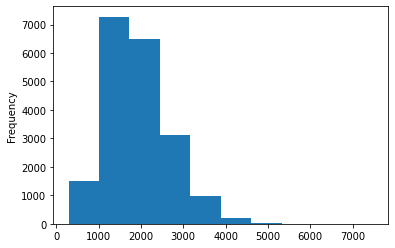

In [0]:
housing['sqft_living'].plot(kind="hist")

Out[79]: <AxesSubplot:ylabel='Frequency'>

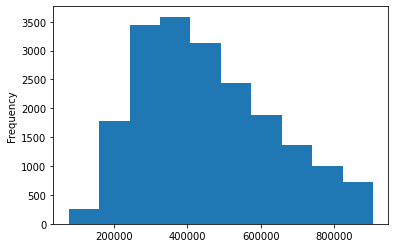

In [0]:
housing['price'].plot(kind="hist")

In [0]:
import matplotlib.pyplot as plt

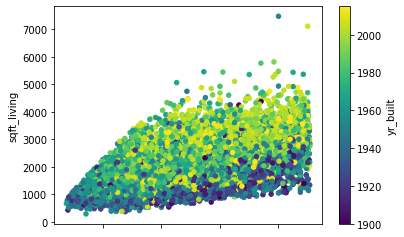

In [0]:
ax1 = housing.plot.scatter(x='price',
                       y='sqft_living',
                       c='yr_built',
                           colormap='viridis')

Out[129]: <AxesSubplot:xlabel='bedrooms', ylabel='price'>

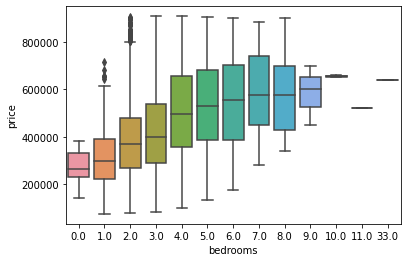

In [0]:
import seaborn as sns
sns.boxplot(data = housing, x = 'bedrooms', y = 'price')